In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\dell\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\dell\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\dell\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Users\dell\anaconda3\Lib\site-packages

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:
print("Loading the dataset...")
df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\ssense_dataset.csv')

# Display basic information
print("\nFirst few rows of the dataset:")
print(df.head())

Loading the dataset...

First few rows of the dataset:
        brand                                        description  price_usd  \
0  Rick Owens                    Black Moncler Edition Down Coat       2585   
1  Rick Owens           Black Moncler Edition Cyclopic Down Coat       2405   
2  Rick Owens         Black Moncler Edition Cyclopic Down Jacket       3160   
3  Rick Owens            Taupe & Green Moncler Edition Down Coat       3505   
4  Rick Owens  Taupe & Green Moncler Edition Cyclopic Down Ja...       2885   

   type  
0  mens  
1  mens  
2  mens  
3  mens  
4  mens  


In [3]:
print("Dataset Overview:")
print("-" * 50)
print(f"Total number of products: {len(df)}")
print(f"Number of unique brands: {df['brand'].nunique()}")
print(f"Price range: ${df['price_usd'].min()} to ${df['price_usd'].max()}")

Dataset Overview:
--------------------------------------------------
Total number of products: 19919
Number of unique brands: 631
Price range: $20 to $13000


In [4]:
print("\nProducts by Gender:")
print("-" * 50)
print(df['type'].value_counts())
print(f"\nGender distribution percentage:")
print(df['type'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')


Products by Gender:
--------------------------------------------------
type
mens      11771
womens     8148
Name: count, dtype: int64

Gender distribution percentage:
type
mens      59.09%
womens    40.91%
Name: proportion, dtype: object


In [5]:
print("\nPrice Analysis (USD):")
print("-" * 50)
print("\nPrice statistics by gender:")
print(df.groupby('type')['price_usd'].agg(['mean', 'median', 'std', 'min', 'max']).round(2))


Price Analysis (USD):
--------------------------------------------------

Price statistics by gender:
          mean  median     std  min    max
type                                      
mens    503.08   320.0  614.06   20   9315
womens  640.80   400.0  763.15   20  13000


In [6]:
print("\nTop 10 Brands by Product Count:")
print("-" * 50)
top_brands = df['brand'].value_counts().head(10)
print(top_brands)


Top 10 Brands by Product Count:
--------------------------------------------------
brand
Gucci             481
Nike              299
Bottega Veneta    296
Rick Owens        258
Marni             250
A.P.C.            249
AMI Paris         244
Isabel Marant     240
rag & bone        215
Marc Jacobs       196
Name: count, dtype: int64


In [7]:
# Price segments analysis
print("\nPrice Segments Distribution:")
print("-" * 50)
df['price_segment'] = pd.cut(df['price_usd'], 
                            bins=[0, 100, 500, 1000, 5000, float('inf')],
                            labels=['Budget (<$100)', 'Mid-range ($100-500)', 
                                   'Premium ($500-1000)', 'Luxury ($1000-5000)', 
                                   'Ultra-luxury (>$5000)'])
print(df['price_segment'].value_counts().sort_index())


Price Segments Distribution:
--------------------------------------------------
price_segment
Budget (<$100)            1872
Mid-range ($100-500)     11256
Premium ($500-1000)       4177
Luxury ($1000-5000)       2573
Ultra-luxury (>$5000)       41
Name: count, dtype: int64


In [8]:
# Average price for top brands
print("\nAverage Price for Top 10 Brands:")
print("-" * 50)
top_10_brands = df['brand'].value_counts().head(10).index
top_brands_avg_price = df[df['brand'].isin(top_10_brands)].groupby('brand')['price_usd'].mean().sort_values(ascending=False)
print(top_brands_avg_price.round(2))


Average Price for Top 10 Brands:
--------------------------------------------------
brand
Rick Owens        1843.39
Bottega Veneta    1712.03
Gucci             1163.90
Marni              660.36
Isabel Marant      619.19
AMI Paris          392.65
A.P.C.             346.20
rag & bone         311.00
Marc Jacobs        287.69
Nike               114.04
Name: price_usd, dtype: float64


In [9]:
# Data Quality Check
# ---------------------------
print("\nData Quality Analysis:")
print("-" * 50)

# Check for missing values
print("\nMissing Values Check:")
print(df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate entries: {duplicates}")

# Basic statistics of price
print("\nPrice Statistics (USD):")
print(df['price_usd'].describe())


Data Quality Analysis:
--------------------------------------------------

Missing Values Check:
brand            0
description      0
price_usd        0
type             0
price_segment    0
dtype: int64

Number of duplicate entries: 0

Price Statistics (USD):
count    19919.000000
mean       559.414981
std        682.364076
min         20.000000
25%        185.000000
50%        350.000000
75%        648.500000
max      13000.000000
Name: price_usd, dtype: float64



Gender Distribution Analysis:
--------------------------------------------------

Products by Gender:
type
mens      11771
womens     8148
Name: count, dtype: int64


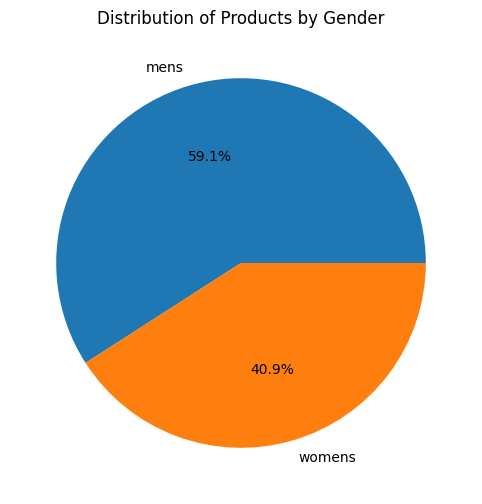

In [10]:
# Gender Distribution Analysis
# ------------------------------------
print("\nGender Distribution Analysis:")
print("-" * 50)

gender_dist = df['type'].value_counts()
print("\nProducts by Gender:")
print(gender_dist)

# Create a pie chart for gender distribution
plt.figure(figsize=(8, 6))
plt.pie(gender_dist.values, labels=gender_dist.index, autopct='%1.1f%%')
plt.title('Distribution of Products by Gender')
plt.show()


Brand Analysis:
--------------------------------------------------

Top 10 Brands by Product Count:
brand
Gucci             481
Nike              299
Bottega Veneta    296
Rick Owens        258
Marni             250
A.P.C.            249
AMI Paris         244
Isabel Marant     240
rag & bone        215
Marc Jacobs       196
Name: count, dtype: int64


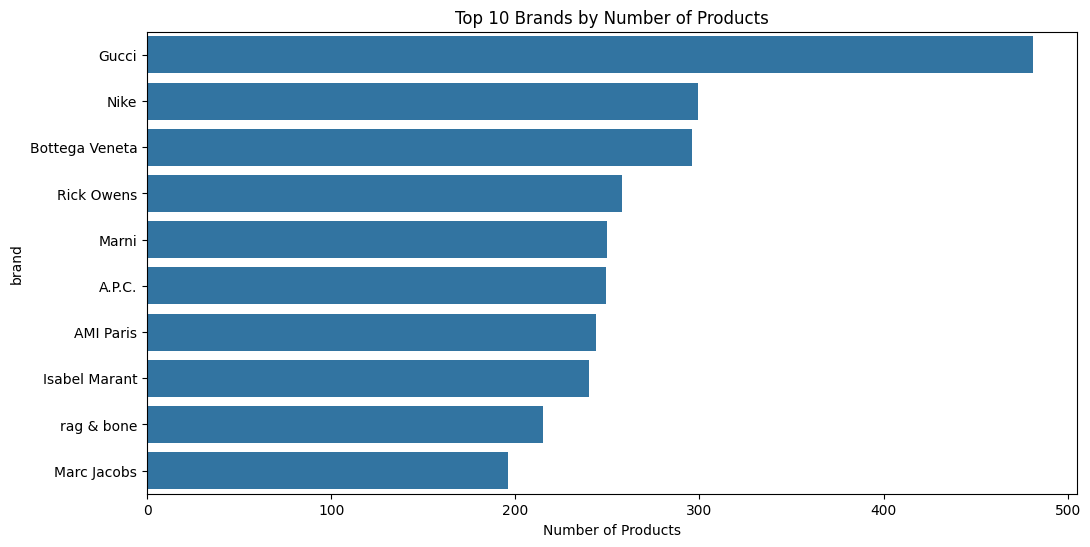


Average Price for Top 10 Brands (USD):
brand
Rick Owens        1843.39
Bottega Veneta    1712.03
Gucci             1163.90
Marni              660.36
Isabel Marant      619.19
AMI Paris          392.65
A.P.C.             346.20
rag & bone         311.00
Marc Jacobs        287.69
Nike               114.04
Name: price_usd, dtype: float64


In [11]:
print("\nBrand Analysis:")
print("-" * 50)

# Top 10 brands
top_brands = df['brand'].value_counts().head(10)
print("\nTop 10 Brands by Product Count:")
print(top_brands)

# Create a bar plot for top brands
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title('Top 10 Brands by Number of Products')
plt.xlabel('Number of Products')
plt.show()

# Calculate average price by brand for top 10 brands
top_brands_avg_price = df[df['brand'].isin(top_brands.index)].groupby('brand')['price_usd'].mean().sort_values(ascending=False)
print("\nAverage Price for Top 10 Brands (USD):")
print(top_brands_avg_price.round(2))


Price Analysis and Segmentation:
--------------------------------------------------

Distribution of Price Segments:
price_segment
Budget           1872
Mid-range       11256
Premium          4177
Luxury           2573
Ultra-luxury       41
Name: count, dtype: int64


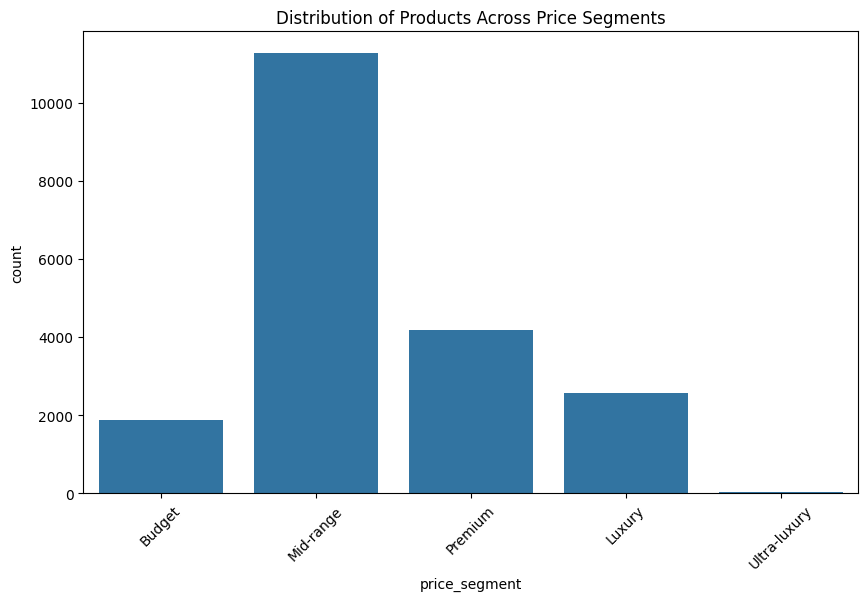

In [12]:
print("\nPrice Analysis and Segmentation:")
print("-" * 50)

# Create price segments
df['price_segment'] = pd.cut(df['price_usd'], 
                            bins=[0, 100, 500, 1000, 5000, float('inf')],
                            labels=['Budget', 'Mid-range', 'Premium', 'Luxury', 'Ultra-luxury'])

# Display distribution of price segments
price_segment_dist = df['price_segment'].value_counts().sort_index()
print("\nDistribution of Price Segments:")
print(price_segment_dist)

# Create a bar plot for price segments
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='price_segment', order=price_segment_dist.index)
plt.title('Distribution of Products Across Price Segments')
plt.xticks(rotation=45)
plt.show()

In [13]:
print("\nAdvanced Analysis - Brand Clustering:")
print("-" * 50)

# Prepare data for clustering
brand_metrics = df.groupby('brand').agg({
    'price_usd': ['mean', 'std', 'count']
}).reset_index()
brand_metrics.columns = ['brand', 'avg_price', 'price_std', 'product_count']

# Select brands with at least 10 products for meaningful analysis
brand_metrics = brand_metrics[brand_metrics['product_count'] >= 10]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(brand_metrics[['avg_price', 'product_count']])

# Perform K-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
brand_metrics['cluster'] = kmeans.fit_predict(features_scaled)

# Display cluster information
print("\nBrand Clusters Based on Price and Product Count:")
for cluster in range(n_clusters):
    cluster_brands = brand_metrics[brand_metrics['cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Number of brands: {len(cluster_brands)}")
    print(f"Average price range: ${cluster_brands['avg_price'].mean():.2f}")
    print("Top brands in this cluster:")
    print(cluster_brands.nlargest(3, 'product_count')[['brand', 'avg_price', 'product_count']])


Advanced Analysis - Brand Clustering:
--------------------------------------------------

Brand Clusters Based on Price and Product Count:

Cluster 0:
Number of brands: 314
Average price range: $291.02
Top brands in this cluster:
                         brand   avg_price  product_count
197                      GANNI  273.874016            127
105  Carhartt Work In Progress  130.292683            123
87                C.P. Company  224.974790            119

Cluster 1:
Number of brands: 107
Average price range: $808.87
Top brands in this cluster:
                         brand   avg_price  product_count
225  HOMME PLISSÉ ISSEY MIYAKE  573.565891            129
77                        Bode  885.468750            128
393                  Off-White  583.634921            126

Cluster 2:
Number of brands: 20
Average price range: $816.99
Top brands in this cluster:
              brand    avg_price  product_count
218           Gucci  1163.902287            481
378            Nike   114.03

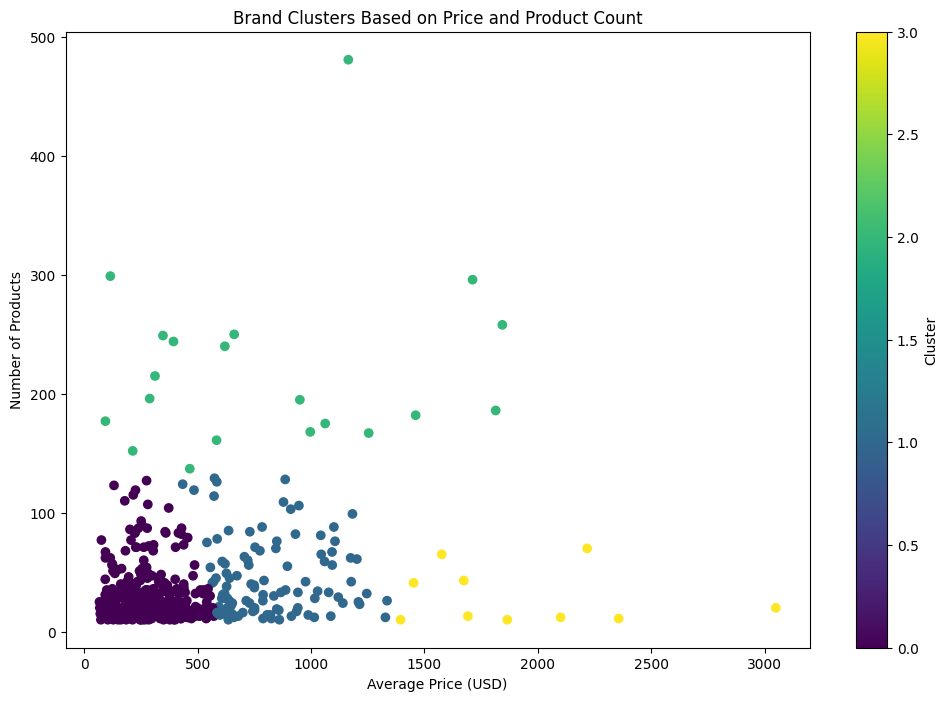

In [14]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(brand_metrics['avg_price'], 
                     brand_metrics['product_count'],
                     c=brand_metrics['cluster'],
                     cmap='viridis')
plt.xlabel('Average Price (USD)')
plt.ylabel('Number of Products')
plt.title('Brand Clusters Based on Price and Product Count')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [15]:
print("Machine Learning Analysis of SSENSE Fashion Dataset")
print("-" * 50)

# Create feature encoders
label_encoder_brand = LabelEncoder()
label_encoder_type = LabelEncoder()

# Create a copy of the dataframe for modeling
df_model = df.copy()

# Encode categorical variables
df_model['brand_encoded'] = label_encoder_brand.fit_transform(df_model['brand'])
df_model['type_encoded'] = label_encoder_type.fit_transform(df_model['type'])

# Create features and target
X = df_model[['brand_encoded', 'type_encoded']]
y = df_model['price_usd']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Machine Learning Analysis of SSENSE Fashion Dataset
--------------------------------------------------


In [16]:
print("\n7.2 Model Training and Evaluation")
print("-" * 30)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'SVR': SVR(kernel='rbf')
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.fit(X_train_scaled, y_train).predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'RMSE': rmse,
        'R2': r2
    }
    
    print(f"RMSE: ${rmse:.2f}")
    print(f"R2 Score: {r2:.4f}")


7.2 Model Training and Evaluation
------------------------------

Training Linear Regression...
RMSE: $713.72
R2 Score: 0.0095

Training Random Forest...
RMSE: $551.80
R2 Score: 0.4080

Training Gradient Boosting...
RMSE: $608.44
R2 Score: 0.2802

Training XGBoost...
RMSE: $585.73
R2 Score: 0.3329

Training SVR...
RMSE: $747.71
R2 Score: -0.0871



7.3 Model Comparison Visualization
------------------------------


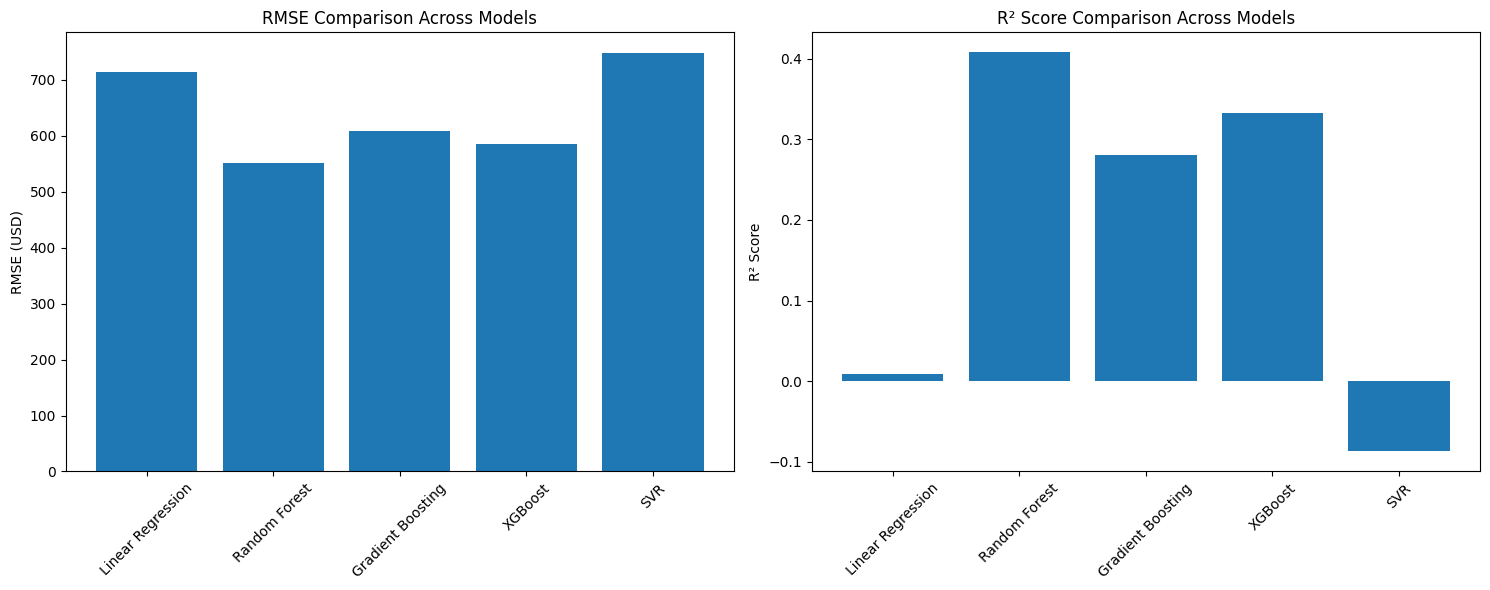

In [17]:
print("\n7.3 Model Comparison Visualization")
print("-" * 30)

# Create comparison plots
plt.figure(figsize=(15, 6))

# RMSE Comparison
plt.subplot(1, 2, 1)
rmse_values = [results[model]['RMSE'] for model in results]
plt.bar(results.keys(), rmse_values)
plt.title('RMSE Comparison Across Models')
plt.xticks(rotation=45)
plt.ylabel('RMSE (USD)')

# R2 Comparison
plt.subplot(1, 2, 2)
r2_values = [results[model]['R2'] for model in results]
plt.bar(results.keys(), r2_values)
plt.title('R² Score Comparison Across Models')
plt.xticks(rotation=45)
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()


7.4 Feature Importance Analysis
------------------------------


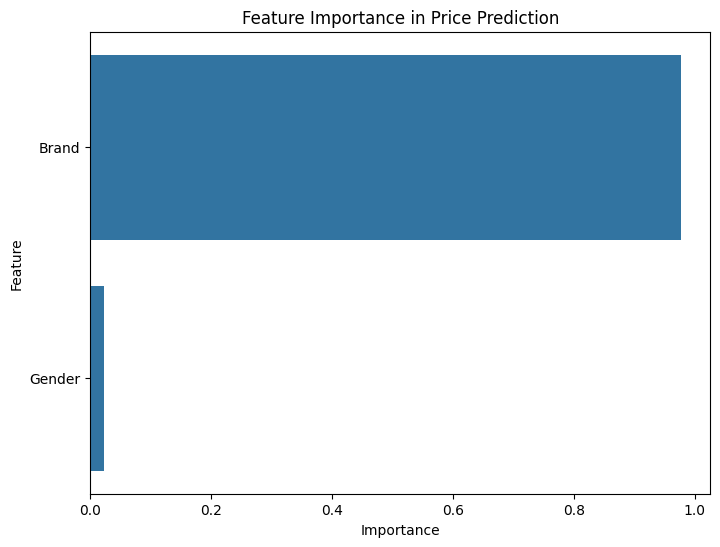

In [18]:
print("\n7.4 Feature Importance Analysis")
print("-" * 30)

rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': ['Brand', 'Gender'],
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Price Prediction')
plt.show()


7.5 Price Prediction Analysis
------------------------------


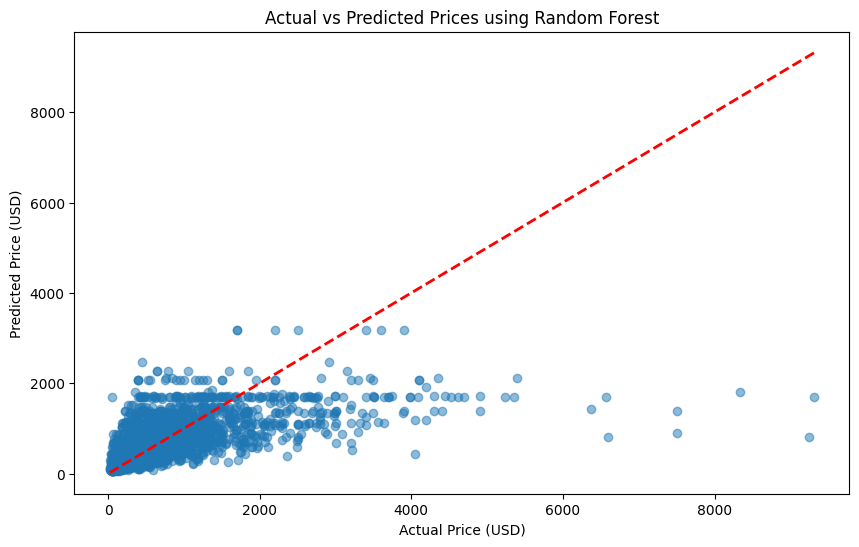


Prediction Error Statistics:
Mean Error: $12.85
Median Error: $-34.20
Standard Deviation of Error: $551.72


In [19]:
print("\n7.5 Price Prediction Analysis")
print("-" * 30)

# Use the best performing model (based on previous results)
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]

# Get predictions
y_pred_best = best_model.predict(X_test_scaled)

# Create prediction vs actual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title(f'Actual vs Predicted Prices using {best_model_name}')
plt.show()

# Calculate prediction error statistics
errors = y_test - y_pred_best
print("\nPrediction Error Statistics:")
print(f"Mean Error: ${errors.mean():.2f}")
print(f"Median Error: ${np.median(errors):.2f}")
print(f"Standard Deviation of Error: ${errors.std():.2f}")


7.6 Price Range Prediction Accuracy
------------------------------

Overall Price Range Prediction Accuracy: 55.67%


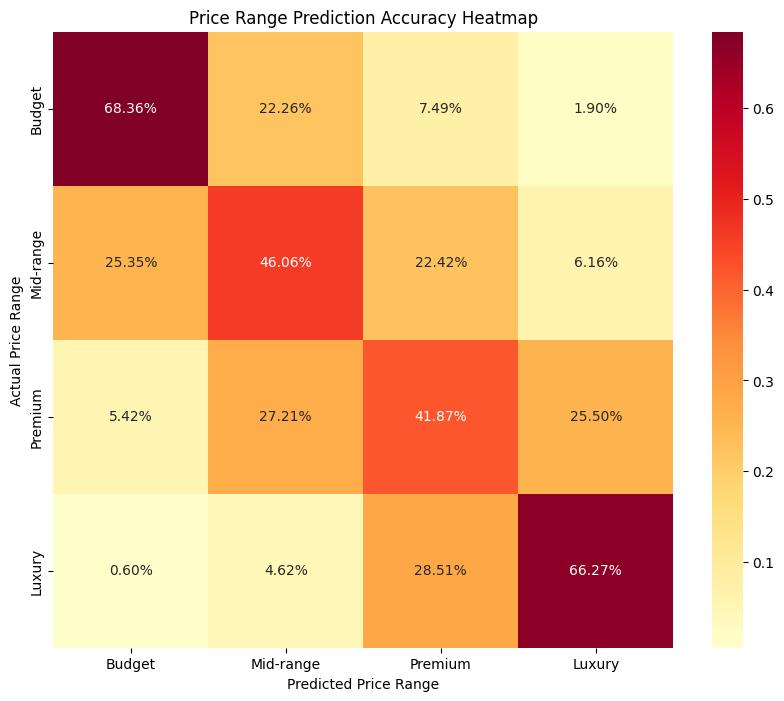

In [20]:
print("\n7.6 Price Range Prediction Accuracy")
print("-" * 30)

# Create price ranges
price_ranges = pd.qcut(y_test, q=4, labels=['Budget', 'Mid-range', 'Premium', 'Luxury'])
pred_ranges = pd.qcut(y_pred_best, q=4, labels=['Budget', 'Mid-range', 'Premium', 'Luxury'])

# Calculate accuracy by price range
range_accuracy = (price_ranges == pred_ranges).mean()
print(f"\nOverall Price Range Prediction Accuracy: {range_accuracy:.2%}")

# Create confusion matrix for price ranges
confusion_matrix = pd.crosstab(price_ranges, pred_ranges, normalize='index')

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('Price Range Prediction Accuracy Heatmap')
plt.xlabel('Predicted Price Range')
plt.ylabel('Actual Price Range')
plt.show()